In [14]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../data/adam_wobn"
image_path = "./images/adam_wobn"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
lr_fn = lambda js : js["optimizer"]["lr"]
p_fn = lambda js : js["norm"]["norm_multiply"]
wd_fn = lambda js : js["optimizer"]["lambda_wd"]
get_hyperparam_best_acc(data_path,
                        ["noreg","norm","cnorm","cnormu","gcstdu","wd"],
                        [lr_fn,p_fn,p_fn,p_fn,p_fn,wd_fn])

Best of noreg is 0.0002 & 82.1\%
Best of norm is 1.4 & 86.23\%
Best of cnorm is 1.4 & 84.3\%
Best of cnormu is 1.2 & 85.61\%
Best of gcstdu is 1.2 & 85.42\%
Best of wd is 8e-05 & 82.22\%


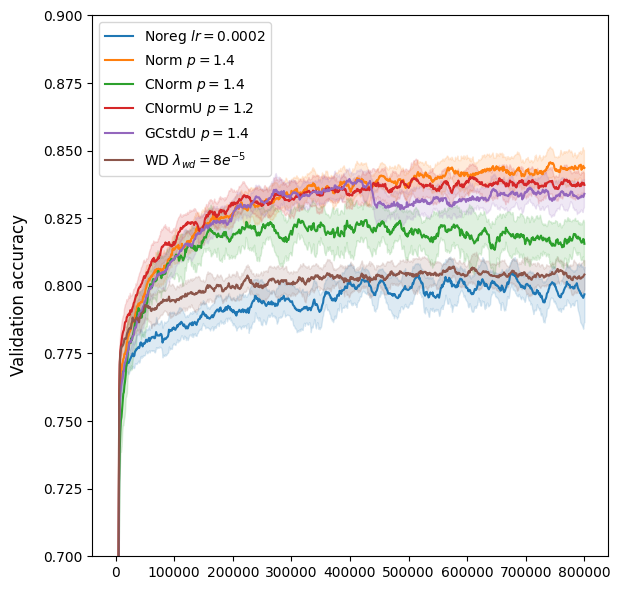

In [10]:
fig,axs = plot_wobn_best_hyperparameter_validation_curve(data_path,image_path,
                                               ["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                                               [r"Noreg $lr = 0.0002$", r"Norm $p=1.4$", r"CNorm $p=1.4$", r"CNormU $p=1.2$", r"GCstdU $p=1.4$",r"WD $\lambda_{wd}=8e^{-5}$"],
                                               [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],
                                               800000)
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/best_hyperparameter_validation_accuracy.png", bbox_inches='tight',dpi=1200)

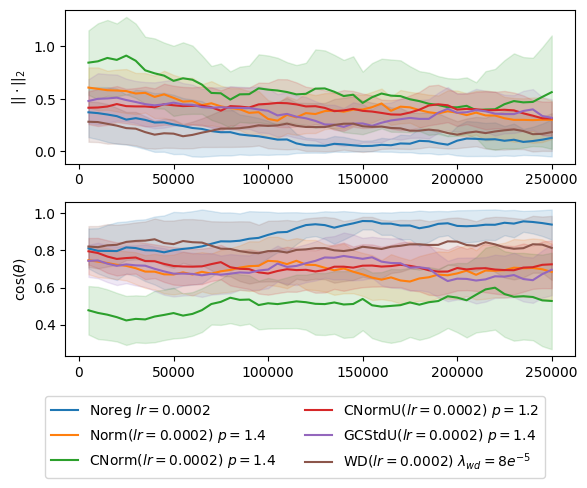

In [2]:
fig,axs = distribution_drift(data_path,["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                             [r"Noreg $lr=0.0002$","Norm($lr=0.0002$) $p=1.4$","CNorm($lr=0.0002$) $p=1.4$","CNormU($lr=0.0002$) $p=1.2$","GCStdU($lr=0.0002$) $p=1.4$",r"WD($lr=0.0002$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/ics.png", bbox_inches='tight',dpi=1200)

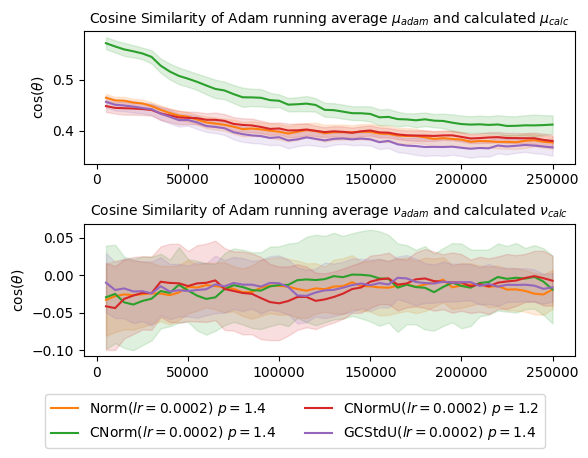

In [13]:
fig,axs = adam_drift(data_path,["norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1"],
                             ["Norm($lr=0.0002$) $p=1.4$","CNorm($lr=0.0002$) $p=1.4$","CNormU($lr=0.0002$) $p=1.2$","GCStdU($lr=0.0002$) $p=1.4$"],
                             [colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()

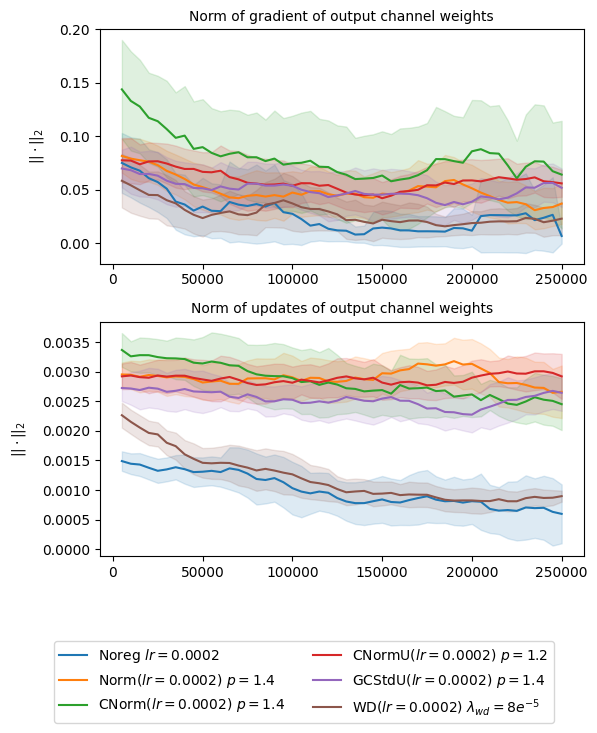

In [12]:

fig,axs = gradients_and_updates(data_path,["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                     [r"Noreg $lr=0.0002$","Norm($lr=0.0002$) $p=1.4$","CNorm($lr=0.0002$) $p=1.4$","CNormU($lr=0.0002$) $p=1.2$","GCStdU($lr=0.0002$) $p=1.4$",r"WD($lr=0.0002$) $\lambda_{wd}=8e^{-5}$"],
                     [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],"mg_spacing_0",layer="conv|out")

fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/grad_and_update_norm.png", bbox_inches='tight',dpi=1200)


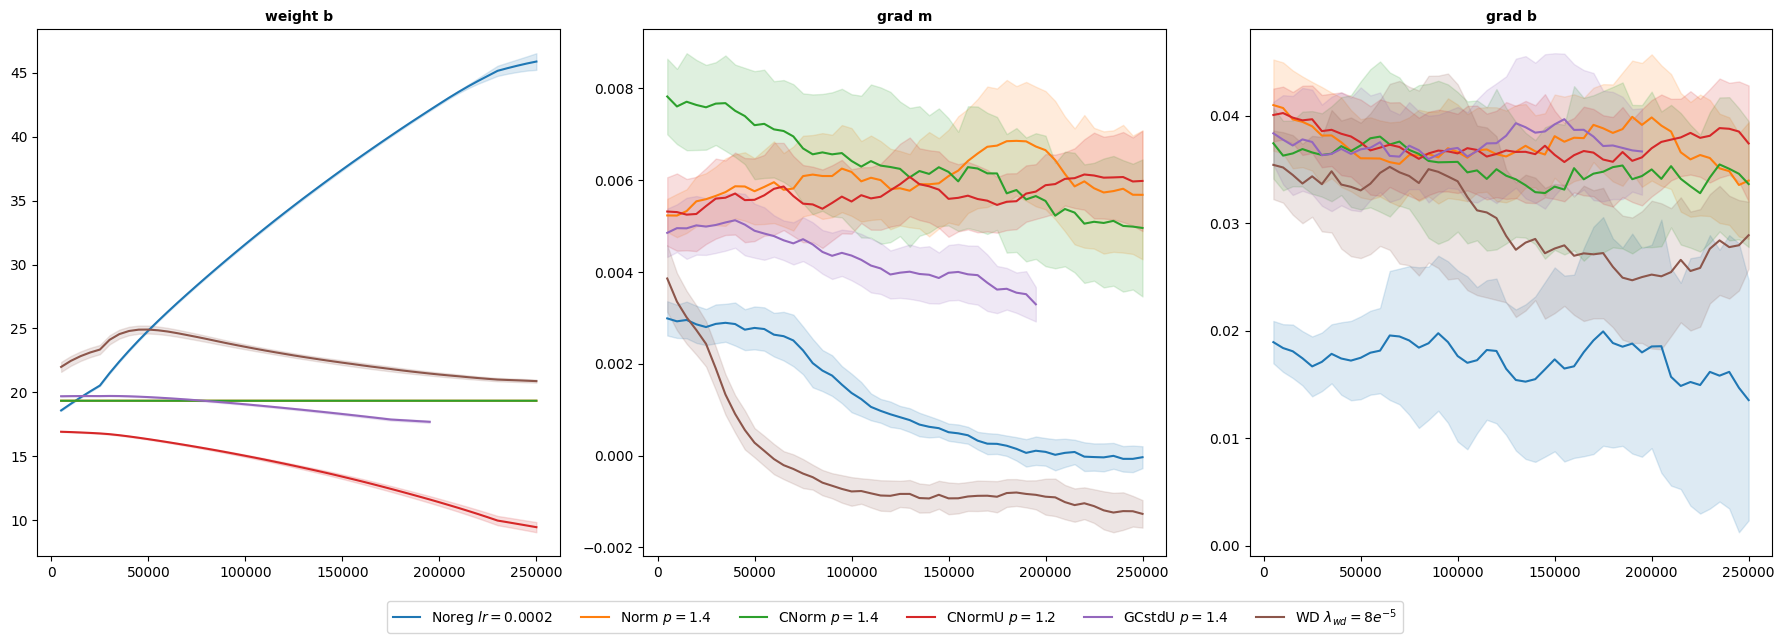

In [9]:
exps = ["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0002$", r"Norm $p=1.4$",r"CNorm $p=1.4$", r"CNormU $p=1.2$", r"GCstdU $p=1.4$",r"WD $\lambda_{wd}=8e^{-5}$"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))

fig,axs = mg_spacing(data_path,exps,labels,colors,"mg_spacing_0")

KeyboardInterrupt: 

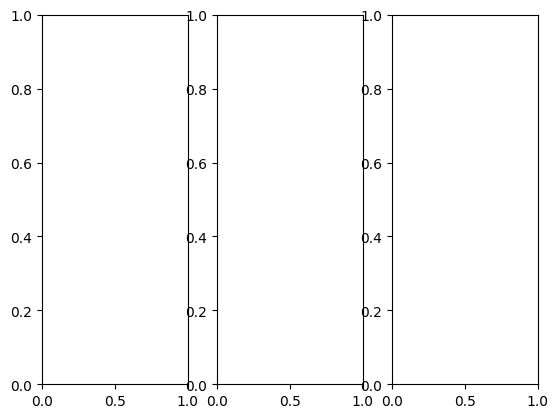

In [4]:
exps = ["noreg/0.0002","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0002$", r"CNorm $p=1.4$", r"CNormU $p=1.2$", r"GCstdU $p=1.4$",r"WD $\lambda_{wd}=8e^{-5}$"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))

fig,axs = mg_spacing_and_bar_plot(data_path,exps,labels,colors,"mg_spacing_0","updates")

#fig.savefig(f"{image_path}/mb_of_mg_spacing_0_100000_and_validation_accuracy_barplot.png", bbox_inches='tight',dpi=300)